In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the correct filename if needed
df = pd.read_csv('/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv')

# Show basic information about the dataset
print("Basic Info:")
print(df.info())

# Display first 5 rows of the dataset
print("\nPreview of Data:")
print(df.head())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   obje

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [2]:
# Step 1: Keep only resolved tickets (non-null Time to Resolution and Satisfaction Rating)
resolved_df = df.dropna(subset=['Time to Resolution', 'Customer Satisfaction Rating'])

# Step 2: Convert time columns to datetime
resolved_df['First Response Time'] = pd.to_datetime(resolved_df['First Response Time'], errors='coerce')
resolved_df['Time to Resolution'] = pd.to_datetime(resolved_df['Time to Resolution'], errors='coerce')

# Step 3: Calculate resolution duration in hours
resolved_df['Resolution Duration (hrs)'] = (resolved_df['Time to Resolution'] - resolved_df['First Response Time']).dt.total_seconds() / 3600

# Step 4: View summary
print(resolved_df[['Ticket Type', 'Ticket Subject', 'Resolution Duration (hrs)', 'Customer Satisfaction Rating']].head())
print("\nRows after filtering:", resolved_df.shape[0])


             Ticket Type   Ticket Subject  Resolution Duration (hrs)  \
2        Technical issue  Network problem                   6.850000   
3        Billing inquiry   Account access                  -5.533333   
4        Billing inquiry        Data loss                  19.683333   
10  Cancellation request        Data loss                 -17.916667   
11       Product inquiry     Software bug                  -2.633333   

    Customer Satisfaction Rating  
2                            3.0  
3                            3.0  
4                            1.0  
10                           1.0  
11                           1.0  

Rows after filtering: 2769


/tmp/ipykernel_118/2674983061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_df['First Response Time'] = pd.to_datetime(resolved_df['First Response Time'], errors='coerce')
/tmp/ipykernel_118/2674983061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resolved_df['Time to Resolution'] = pd.to_datetime(resolved_df['Time to Resolution'], errors='coerce')
/tmp/ipykernel_118/2674983061.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [3]:
# Step 1: Remove negative or null durations
resolved_df = resolved_df[resolved_df['Resolution Duration (hrs)'] > 0]

# Step 2: Reset index for clarity
resolved_df.reset_index(drop=True, inplace=True)

# Step 3: Check result
print("Cleaned rows:", resolved_df.shape[0])
print(resolved_df[['Ticket Type', 'Resolution Duration (hrs)', 'Customer Satisfaction Rating']].head())


Cleaned rows: 1402
            Ticket Type  Resolution Duration (hrs)  \
0       Technical issue                   6.850000   
1       Billing inquiry                  19.683333   
2        Refund request                  19.716667   
3       Technical issue                   6.766667   
4  Cancellation request                  17.483333   

   Customer Satisfaction Rating  
0                           3.0  
1                           1.0  
2                           5.0  
3                           5.0  
4                           1.0  


In [4]:
# Group by 'Ticket Type' and calculate required stats
type_summary = resolved_df.groupby('Ticket Type').agg(
    Ticket_Count=('Ticket Type', 'count'),
    Avg_Resolution_Hours=('Resolution Duration (hrs)', 'mean'),
    Avg_Satisfaction=('Customer Satisfaction Rating', 'mean')
).sort_values(by='Ticket_Count', ascending=False)

# Round results for readability
type_summary = type_summary.round(2)

# Show the summary
print(type_summary)


                      Ticket_Count  Avg_Resolution_Hours  Avg_Satisfaction
Ticket Type                                                               
Technical issue                305                  7.37              2.89
Refund request                 303                  8.14              2.90
Billing inquiry                273                  7.01              3.14
Cancellation request           265                  7.69              3.12
Product inquiry                256                  7.71              3.14


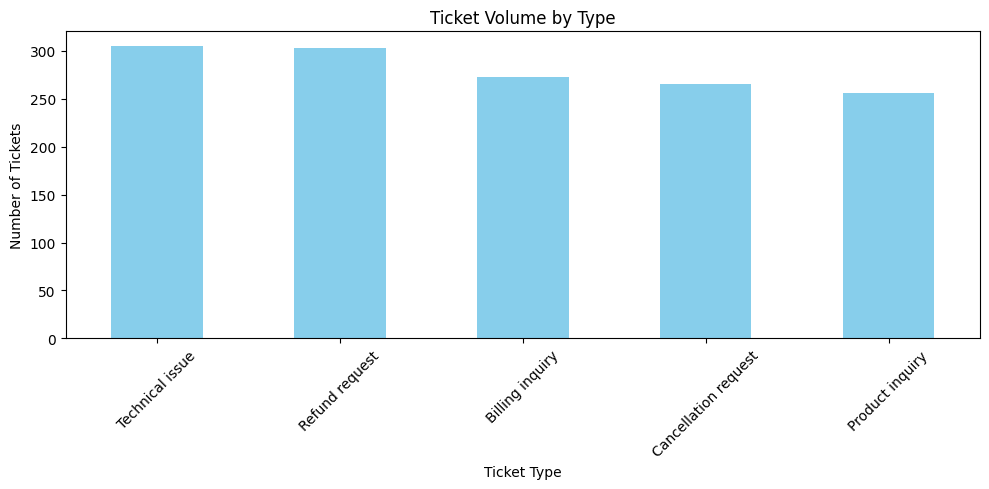

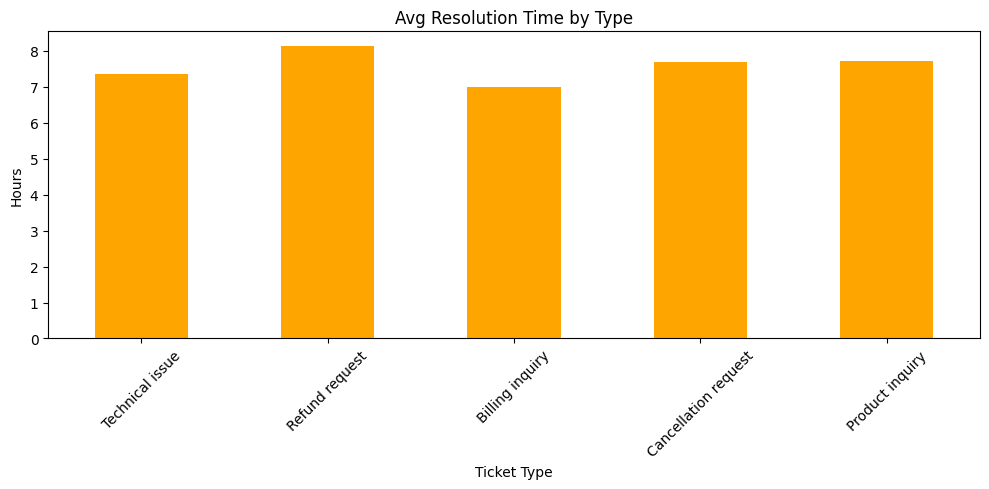

In [5]:
import matplotlib.pyplot as plt

# Plot ticket count
type_summary['Ticket_Count'].plot(kind='bar', figsize=(10, 5), color='skyblue', title='Ticket Volume by Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average resolution hours
type_summary['Avg_Resolution_Hours'].plot(kind='bar', figsize=(10, 5), color='orange', title='Avg Resolution Time by Type')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
type_summary.to_csv('/kaggle/working/ticket_type_summary.csv')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


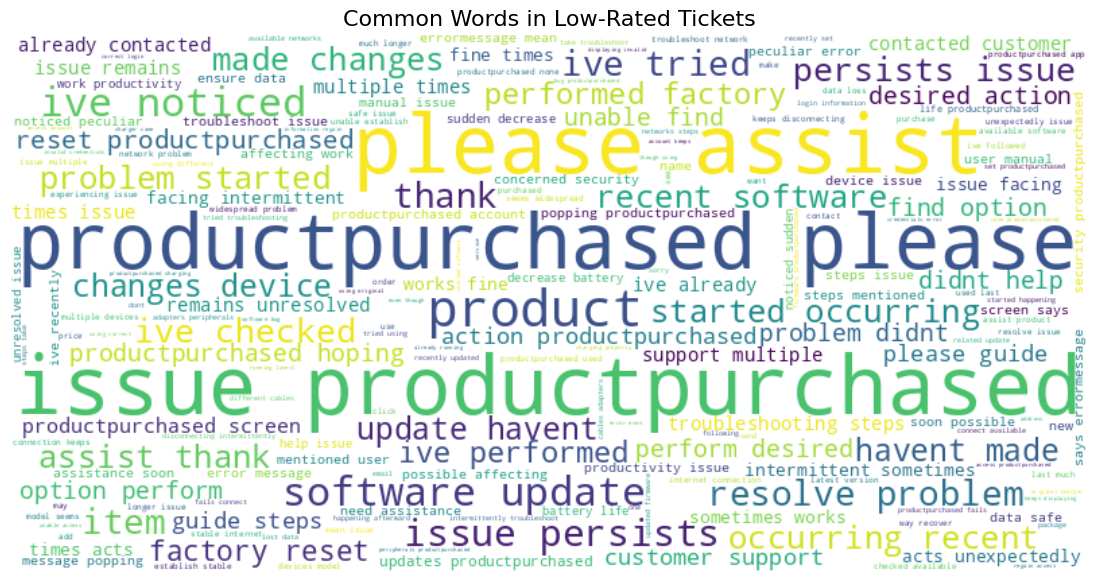

In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Download NLTK stopwords
nltk.download('stopwords')

# Filter low-rated tickets (rating ≤ 2)
low_rated = resolved_df[resolved_df['Customer Satisfaction Rating'] <= 2]

# Combine all ticket descriptions into a single string
text = " ".join(low_rated['Ticket Description'].dropna().astype(str).tolist())

# Clean text
text = text.lower()  # Lowercase
text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
words = text.split()
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Low-Rated Tickets', fontsize=16)
plt.show()


In [8]:
# Expanded keywords
categories = {
    'Technical issue': ['software', 'update', 'reset', 'crash', 'bug', 'error', 'slow', 'problem', 'issue', 'persist', 'network', 'connect', 'install'],
    'Billing inquiry': ['billing', 'charge', 'refund', 'payment', 'invoice', 'cost', 'price', 'subscription'],
    'Account access': ['login', 'password', 'account', 'access', 'reset', 'locked', 'sign in', 'sign-in', 'credential'],
    'Product inquiry': ['feature', 'specification', 'compatibility', 'question', 'info', 'information', 'details'],
    'Cancellation request': ['cancel', 'stop', 'terminate', 'refund', 'unsubscribe', 'subscription'],
}

# Function to categorize based on both subject and description
def categorize_ticket(text_subject, text_description):
    combined_text = (str(text_subject) + " " + str(text_description)).lower()
    for category, keywords in categories.items():
        if any(keyword in combined_text for keyword in keywords):
            return category
    return 'Other'

# Apply to dataframe
resolved_df['Issue Category'] = resolved_df.apply(
    lambda row: categorize_ticket(row['Ticket Subject'], row['Ticket Description']), axis=1
)

# Check counts again
category_counts = resolved_df['Issue Category'].value_counts()
print(category_counts)


Issue Category
Technical issue    1400
Billing inquiry       1
Other                 1
Name: count, dtype: int64


In [9]:
print("Billing inquiry samples:")
print(resolved_df[resolved_df['Issue Category'] == 'Billing inquiry'][['Ticket Subject', 'Ticket Description']].head(5))

print("\nOther category samples:")
print(resolved_df[resolved_df['Issue Category'] == 'Other'][['Ticket Subject', 'Ticket Description']].head(5))


Billing inquiry samples:
           Ticket Subject                                 Ticket Description
770  Cancellation request  I've accidentally deleted important data from ...

Other category samples:
     Ticket Subject                                 Ticket Description
1151      Data loss  I've accidentally deleted important data from ...


In [10]:
from collections import Counter
import re

all_text = " ".join(resolved_df['Ticket Description'].dropna().astype(str).tolist()).lower()
words = re.findall(r'\b\w+\b', all_text)

# Count the frequency of words longer than 3 characters and excluding common stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words and len(w) > 3]
word_counts = Counter(filtered_words)

# Print 20 most common words
print(word_counts.most_common(20))


[('product_purchased', 2324), ('issue', 1856), ('please', 1484), ('assist', 1037), ('problem', 379), ('product', 349), ('software', 267), ('data', 258), ('steps', 245), ('account', 240), ('noticed', 204), ('would', 204), ('unable', 198), ('update', 195), ('help', 193), ('resolve', 192), ('device', 192), ('persists', 186), ('using', 172), ('times', 170)]


In [11]:
ticket_type_stats = resolved_df.groupby('Ticket Type').agg({
    'Resolution Duration (hrs)': 'mean',
    'Customer Satisfaction Rating': 'mean',
    'Ticket ID': 'count'
}).rename(columns={'Ticket ID': 'Ticket_Count'}).reset_index()

print(ticket_type_stats)


            Ticket Type  Resolution Duration (hrs)  \
0       Billing inquiry                   7.010256   
1  Cancellation request                   7.693082   
2       Product inquiry                   7.706055   
3        Refund request                   8.144609   
4       Technical issue                   7.365191   

   Customer Satisfaction Rating  Ticket_Count  
0                      3.135531           273  
1                      3.120755           265  
2                      3.140625           256  
3                      2.900990           303  
4                      2.891803           305  


In [12]:
# Filter tickets with Customer Satisfaction Rating <= 2.5
low_sat_tickets = resolved_df[resolved_df['Customer Satisfaction Rating'] <= 2.5]

# Count how many low satisfaction tickets per Ticket Type
low_sat_counts = low_sat_tickets['Ticket Type'].value_counts()

print("Low satisfaction ticket counts by Ticket Type:")
print(low_sat_counts)


Low satisfaction ticket counts by Ticket Type:
Ticket Type
Refund request          127
Technical issue         124
Billing inquiry         103
Cancellation request     98
Product inquiry          87
Name: count, dtype: int64


In [13]:
low_sat_counts.to_csv("low_satisfaction_by_ticket_type.csv")


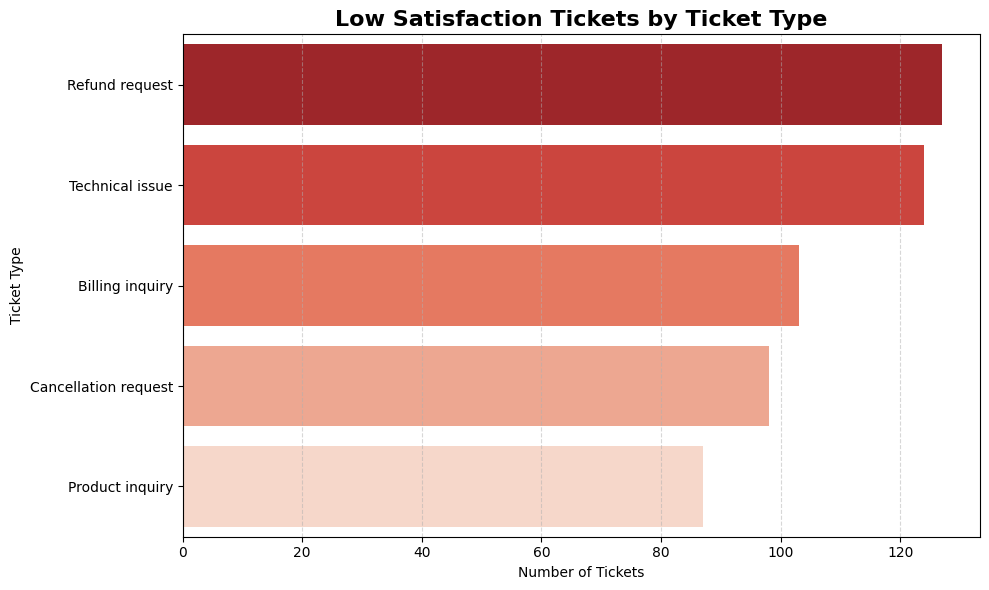

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of low satisfaction tickets by Ticket Type
low_sat_counts = resolved_df[resolved_df['Customer Satisfaction Rating'] <= 2.5]['Ticket Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=low_sat_counts.values, y=low_sat_counts.index, palette="Reds_r")
plt.title('Low Satisfaction Tickets by Ticket Type', fontsize=16, weight='bold')
plt.xlabel('Number of Tickets')
plt.ylabel('Ticket Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
# Filter low satisfaction tickets (rating ≤ 2.5)
low_rating_df = resolved_df[resolved_df['Customer Satisfaction Rating'] <= 2.5]

# Focus only on 'Technical issue' and 'Refund request'
focused_issues_df = low_rating_df[low_rating_df['Ticket Type'].isin(['Technical issue', 'Refund request'])]

# Combine all descriptions into one text blob
text_data = ' '.join(focused_issues_df['Ticket Description'].dropna().astype(str).values)

# Basic clean-up for better word cloud
import re
text_data_cleaned = re.sub(r'[^a-zA-Z\s]', '', text_data.lower())


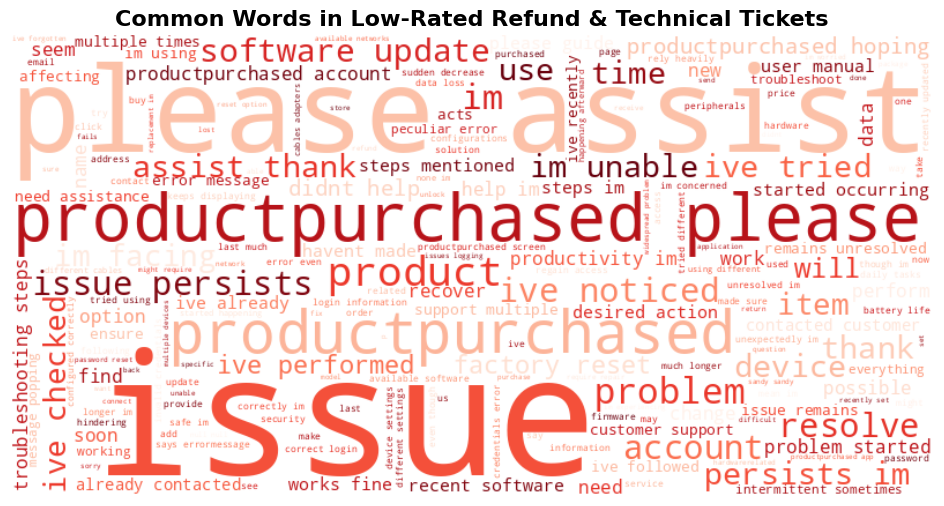

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_data_cleaned)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Low-Rated Refund & Technical Tickets', fontsize=16, weight='bold')
plt.show()



In [17]:
# Filter where satisfaction <= 2
low_rated = resolved_df[
    (resolved_df['Ticket Type'].isin(['Refund request', 'Technical issue'])) &
    (resolved_df['Customer Satisfaction Rating'] <= 2)
]

# Check number of records
print("Low-rated Refund & Technical Tickets:", low_rated.shape[0])
low_rated.head(3)


Low-rated Refund & Technical Tickets: 251


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Duration (hrs),Issue Category
7,47,Cassandra Richards,abigail06@example.com,50,Female,Nintendo Switch Pro Controller,2020-10-15,Refund request,Network problem,I'm having an issue with the {product_purchase...,Closed,Audience food pretty cut.,High,Phone,2023-06-01 03:43:43,2023-06-01 09:24:43,1.0,5.683333,Technical issue
13,83,Joshua Miller,kimjesse@example.com,24,Male,PlayStation,2021-10-04,Refund request,Software bug,I'm having an issue with the {product_purchase...,Closed,Event see dinner home.,Low,Social media,2023-06-01 05:40:30,2023-06-01 20:35:30,1.0,14.916667,Technical issue
25,149,Rebecca Nelson,qmartin@example.com,40,Other,LG Washing Machine,2021-10-24,Refund request,Installation support,I'm having an issue with the {product_purchase...,Closed,Few drive knowledge area.,High,Chat,2023-06-01 08:45:05,2023-06-01 13:55:05,1.0,5.166667,Technical issue


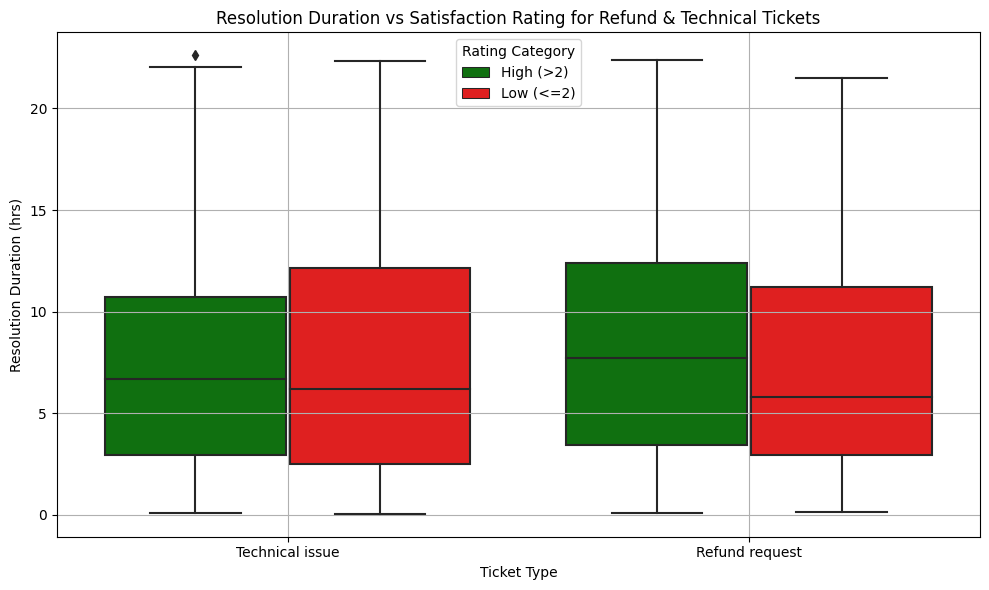

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for rating label
resolved_df['Rating Category'] = resolved_df['Customer Satisfaction Rating'].apply(lambda x: 'Low (<=2)' if x <= 2 else 'High (>2)')

# Filter only Refund & Technical
subset_df = resolved_df[resolved_df['Ticket Type'].isin(['Refund request', 'Technical issue'])]

plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df,
            x='Ticket Type',
            y='Resolution Duration (hrs)',
            hue='Rating Category',
            palette={'Low (<=2)': 'red', 'High (>2)': 'green'})

plt.title('Resolution Duration vs Satisfaction Rating for Refund & Technical Tickets')
plt.ylabel('Resolution Duration (hrs)')
plt.xlabel('Ticket Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Filter data for Refund + Technical only
subset_df = resolved_df[resolved_df['Ticket Type'].isin(['Refund request', 'Technical issue'])].copy()

# Step 2: Label as Low or High based on rating
subset_df['Rating Category'] = subset_df['Customer Satisfaction Rating'].apply(lambda x: 'Low' if x <= 2 else 'High')

# Step 3: Preprocess text (basic cleanup)
subset_df['Cleaned_Description'] = (
    subset_df['Ticket Description']
    .fillna('')
    .str.lower()
    .str.replace(r'[^a-z\s]', '', regex=True)
)

# Step 4: Separate by category
low_desc = subset_df[subset_df['Rating Category'] == 'Low']['Cleaned_Description']
high_desc = subset_df[subset_df['Rating Category'] == 'High']['Cleaned_Description']

# Step 5: TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=30)

# Fit on low-rated tickets
X_low = vectorizer.fit_transform(low_desc)
low_words = pd.DataFrame(X_low.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Fit on high-rated tickets
X_high = vectorizer.fit_transform(high_desc)
high_words = pd.DataFrame(X_high.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Display top keywords
print("🔴 Top words in LOW-rated Refund & Technical Tickets:")
print(low_words.head(15))

print("\n🟢 Top words in HIGH-rated Refund & Technical Tickets:")
print(high_words.head(15))


🔴 Top words in LOW-rated Refund & Technical Tickets:
productpurchased    62.544136
issue               59.304077
im                  54.995426
having              42.613329
assist              42.141725
ive                 37.778730
product             21.790163
problem             20.996867
steps               18.096438
account             17.627706
software            17.527734
need                17.255646
times               16.290566
data                15.353639
device              14.953120
dtype: float64

🟢 Top words in HIGH-rated Refund & Technical Tickets:
productpurchased    92.836684
issue               85.653288
im                  80.062361
having              58.860590
assist              57.839805
ive                 54.899491
problem             32.567461
product             29.162358
data                28.847297
software            26.486952
steps               23.103917
noticed             22.489871
device              21.797239
need                21.318711
resolve

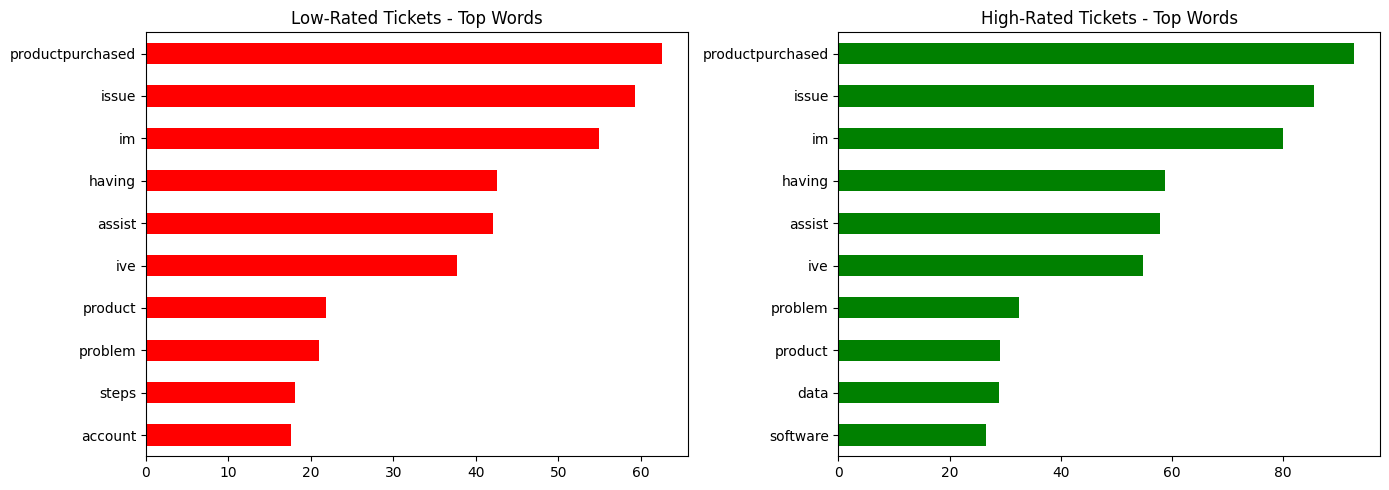

In [20]:
import matplotlib.pyplot as plt

# Plot side-by-side bars
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

low_words.head(10).plot(kind='barh', ax=axes[0], color='red')
axes[0].set_title('Low-Rated Tickets - Top Words')
axes[0].invert_yaxis()

high_words.head(10).plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('High-Rated Tickets - Top Words')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


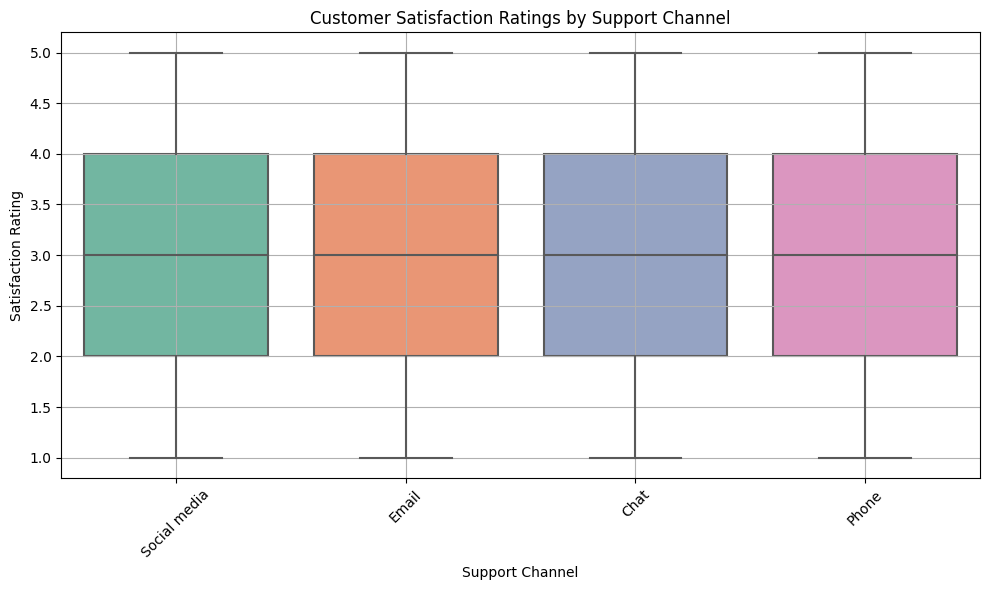

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=resolved_df,
            x='Ticket Channel',
            y='Customer Satisfaction Rating',
            palette='Set2')

plt.title('Customer Satisfaction Ratings by Support Channel')
plt.ylabel('Satisfaction Rating')
plt.xlabel('Support Channel')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


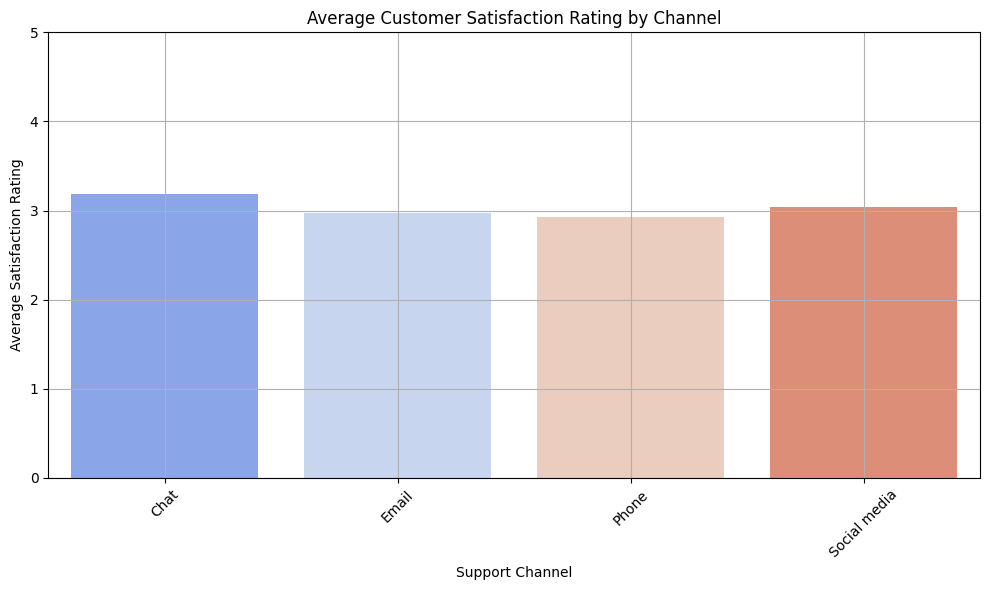

In [22]:
channel_rating = resolved_df.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=channel_rating,
            x='Ticket Channel',
            y='Customer Satisfaction Rating',
            palette='coolwarm')

plt.title('Average Customer Satisfaction Rating by Channel')
plt.ylabel('Average Satisfaction Rating')
plt.xlabel('Support Channel')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='Ticket Priority', ylabel='Customer Satisfaction Rating'>

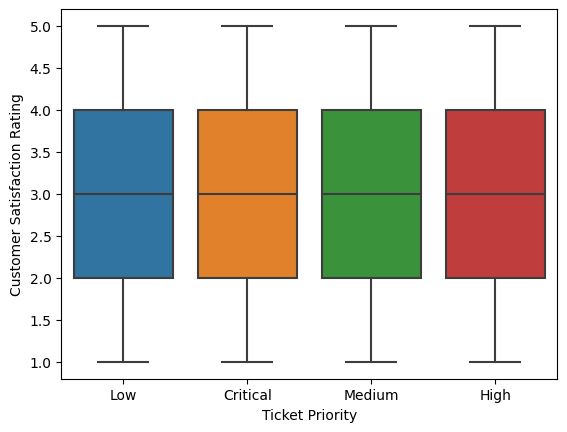

In [23]:
    sns.boxplot(data=resolved_df, x='Ticket Priority', y='Customer Satisfaction Rating')


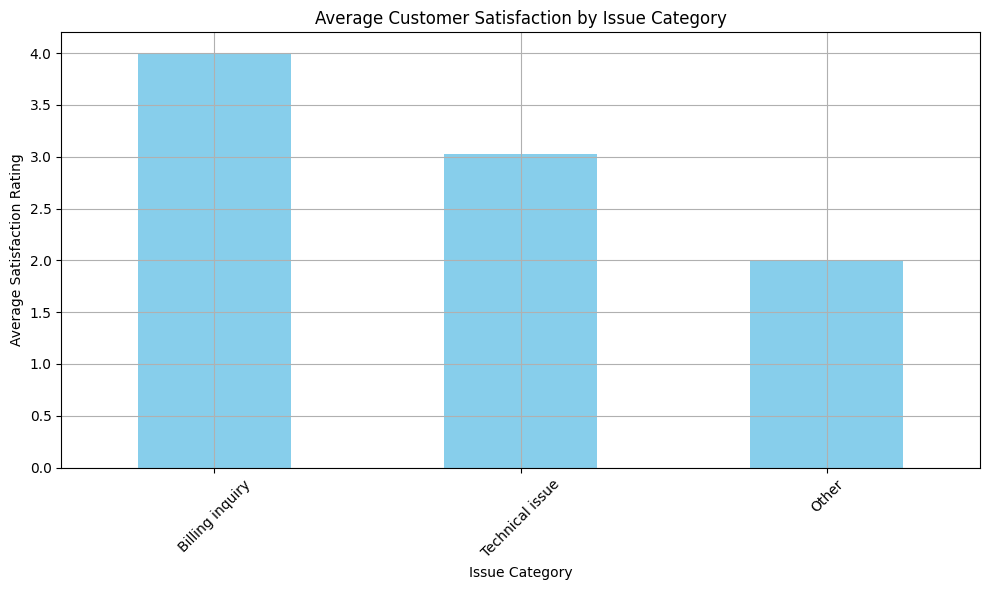

In [24]:
avg_rating_by_issue = resolved_df.groupby('Issue Category')['Customer Satisfaction Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_rating_by_issue.plot(kind='bar', color='skyblue')
plt.title('Average Customer Satisfaction by Issue Category')
plt.ylabel('Average Satisfaction Rating')
plt.xlabel('Issue Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


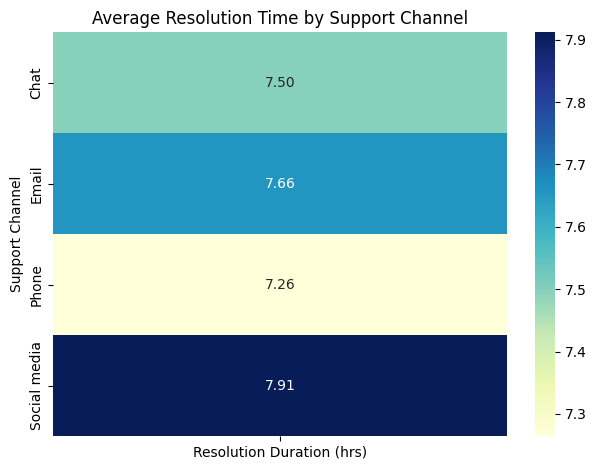

In [25]:
import pandas as pd
pivot_df = resolved_df.pivot_table(values='Resolution Duration (hrs)', index='Ticket Channel', aggfunc='mean')

sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Resolution Time by Support Channel")
plt.ylabel("Support Channel")
plt.tight_layout()
plt.show()


In [26]:
plt.savefig('avg_satisfaction_by_issue.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>